In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=df = pd.read_excel("glass.xlsx",sheet_name='glass')

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
df.shape

(214, 10)

In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


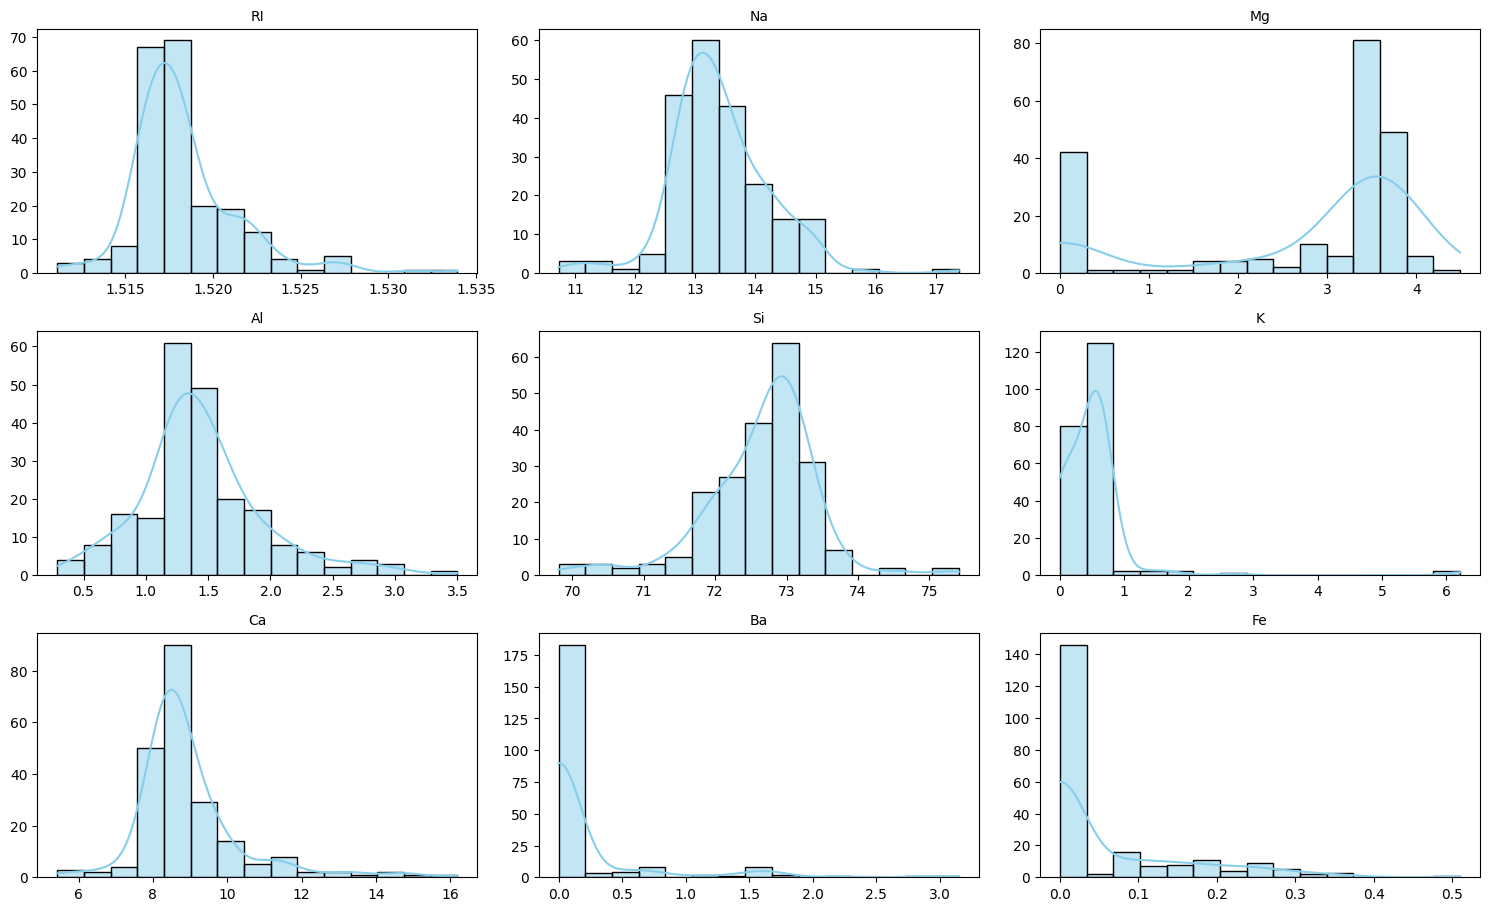

In [8]:
# Plotting histograms for each feature to visualize their distributions
features = df.columns[:-1]

plt.figure(figsize=(15, 12))
for i, col in enumerate(features):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col], bins=15, color='skyblue', kde=True)
    plt.title(col, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

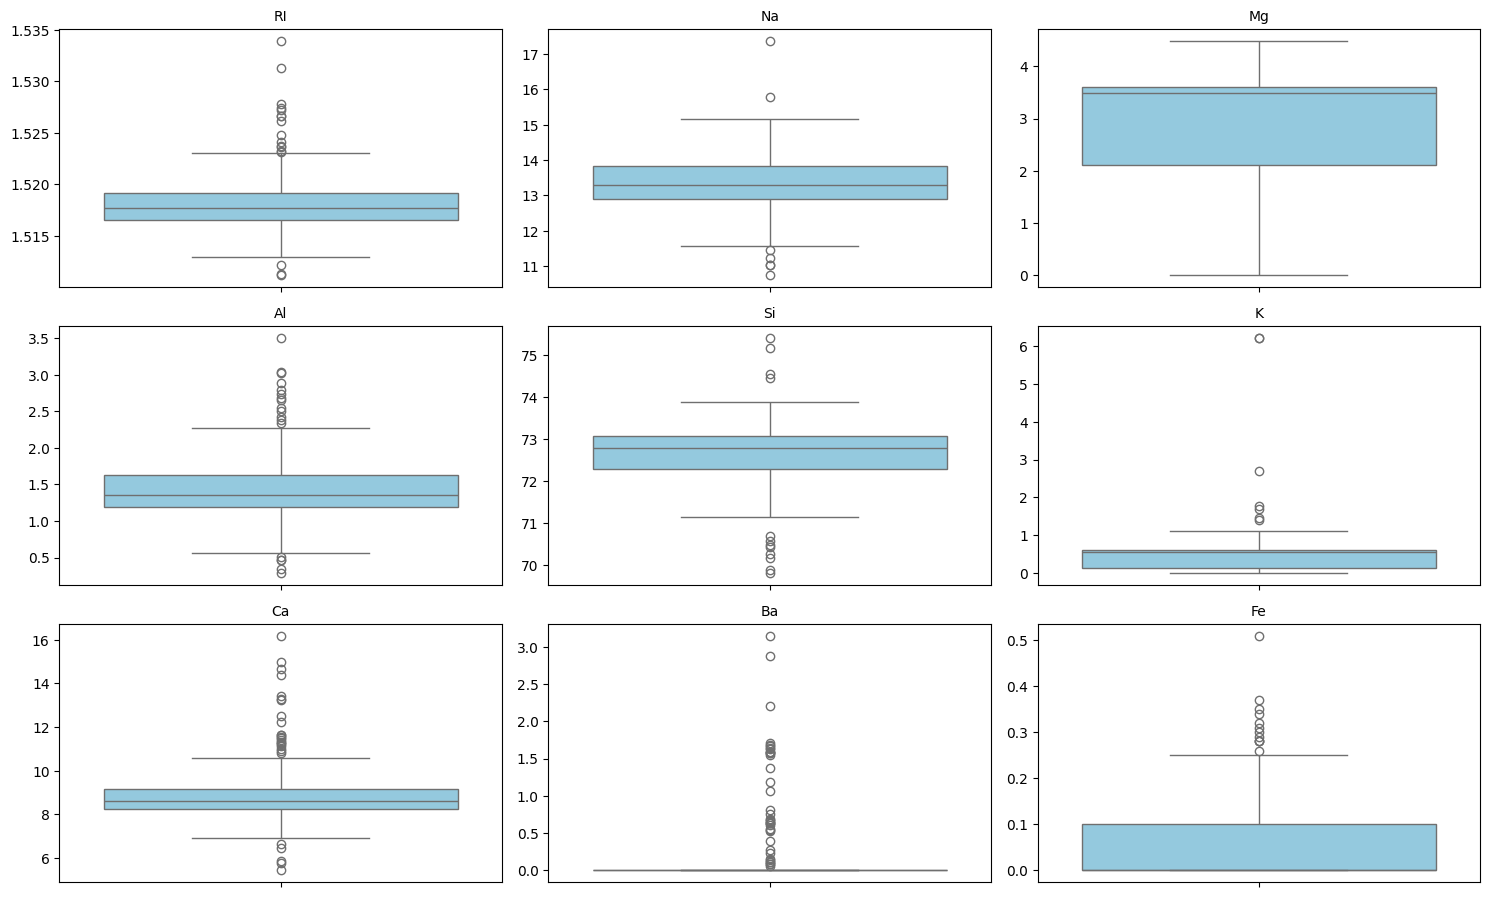

In [9]:
# Plotting boxplots for each feature to check for outliers and distribution spread
features = df.columns[:-1]
plt.figure(figsize=(15, 12))

for i in range(len(features)):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=df[features[i]], color='skyblue')
    plt.title(features[i], fontsize=10)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

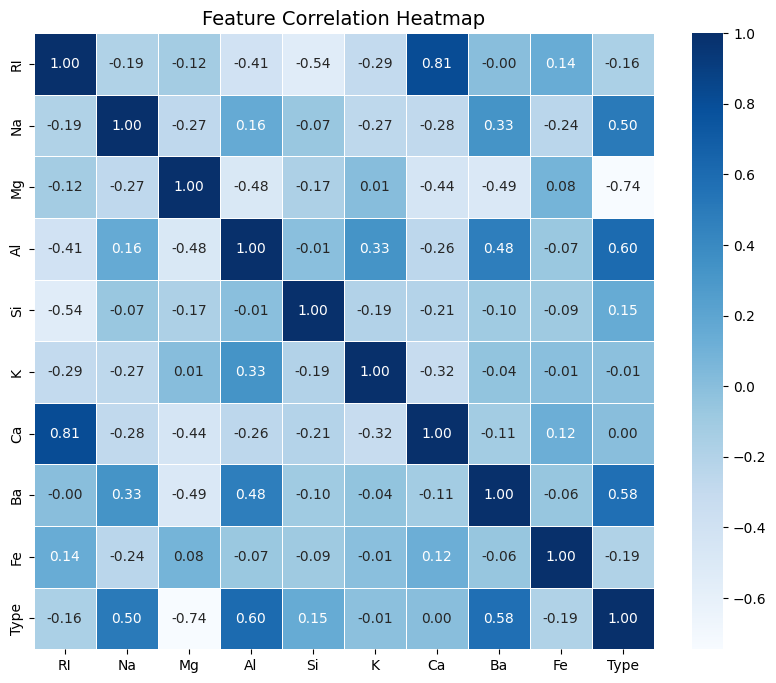

In [10]:
# Plotting a heatmap to visualize correlation between all features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

In [11]:
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [12]:
# scaling features using StandardScaler
# this brings all features to same scale (mean = 0, std = 1)
from sklearn.preprocessing import StandardScaler

X = df.drop('Type', axis=1)
y = df['Type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# converting scaled data back to DataFrame for clarity and further use
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [13]:
df_scaled

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [14]:
y.value_counts()

,count
Type,
2,76
1,70
7,29
3,17
5,13
6,9


In [15]:
# importing train_test_split to divide data
from sklearn.model_selection import train_test_split

# splitting the scaled features and target into training and testing sets
# stratify=y ensures class balance is preserved in both sets
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
# importing SVM and GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining the hyperparameter grid for tuning
# C controls margin softness, gamma affects decision boundary shape
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf', 'linear']  # rbf = non-linear, linear = straight boundary
}

# creating SVM model with class_weight='balanced' to handle class imbalance
svc = SVC(class_weight='balanced')

In [17]:
# applying grid search with 5-fold cross-validation
# this will try all combinations of C, gamma, and kernel
# scoring='accuracy' means it will pick the model with the best average accuracy
grid = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy')

# fitting the grid search on training data
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [25]:
# importing evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# extracting the best model from grid search
best_svm = grid.best_estimator_

# making predictions on the test set
y_pred = best_svm.predict(X_test)

# printing evaluation results
print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n|", confusion_matrix(y_test, y_pred))

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.7209302325581395
Classification Report:
               precision    recall  f1-score   support

           1       0.69      0.64      0.67        14
           2       0.71      0.67      0.69        15
           3       0.50      0.67      0.57         3
           5       1.00      1.00      1.00         3
           6       0.50      0.50      0.50         2
           7       0.86      1.00      0.92         6

    accuracy                           0.72        43
   macro avg       0.71      0.75      0.73        43
weighted avg       0.72      0.72      0.72        43

Confusion Matrix:
| [[ 9  3  2  0  0  0]
 [ 4 10  0  0  1  0]
 [ 0  1  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  1  1]
 [ 0  0  0  0  0  6]]


In [26]:
# creating Random Forest model with class_weight to handle imbalance
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# training the model on training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [27]:
# making predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# printing evaluation results (excluding confusion matrix)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.7441860465116279
Classification Report:
               precision    recall  f1-score   support

           1       0.69      0.79      0.73        14
           2       0.77      0.67      0.71        15
           3       0.50      0.33      0.40         3
           5       0.75      1.00      0.86         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.74        43
   macro avg       0.73      0.77      0.74        43
weighted avg       0.75      0.74      0.74        43



In [21]:
# printing confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Confusion Matrix:
 [[11  2  1  0  0  0]
 [ 3 10  0  1  1  0]
 [ 2  0  1  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  1  0  0  0  5]]


In [22]:
# Bagging with Decision Tree
bag_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bag_model.fit(X_train, y_train)

# Predictions
y_pred_bag = bag_model.predict(X_test)

# Evaluation
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bag))
print("Bagging Report:\n", classification_report(y_test, y_pred_bag))

Bagging Accuracy: 0.7906976744186046
Bagging Report:
               precision    recall  f1-score   support

           1       0.79      0.79      0.79        14
           2       0.85      0.73      0.79        15
           3       0.67      0.67      0.67         3
           5       0.67      0.67      0.67         3
           6       0.67      1.00      0.80         2
           7       0.86      1.00      0.92         6

    accuracy                           0.79        43
   macro avg       0.75      0.81      0.77        43
weighted avg       0.79      0.79      0.79        43



In [29]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# defining Boosting model with shallow Decision Trees
boost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    random_state=42
)

# training the model
boost_model.fit(X_train, y_train)

# making predictions on the test set
y_pred_boost = boost_model.predict(X_test)

# evaluating performance
print("Boosting Accuracy:", accuracy_score(y_test, y_pred_boost))
print("Boosting Report:\n", classification_report(y_test, y_pred_boost))

Boosting Accuracy: 0.3953488372093023
Boosting Report:
               precision    recall  f1-score   support

           1       0.67      0.14      0.24        14
           2       0.36      0.60      0.45        15
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.67      1.00      0.80         2
           7       0.67      0.67      0.67         6

    accuracy                           0.40        43
   macro avg       0.39      0.40      0.36        43
weighted avg       0.47      0.40      0.36        43

